In [1]:
# How have crypto proces changed over time?
import requests
import math
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cryptoQuery = requests.get("https://api.polygon.io/v2/aggs/ticker/X:BTCUSD/range/1/day/2019-01-01/2022-11-01?adjusted=true&sort=asc&limit=120&apiKey=kxqu4MgDawCzmLvkVkfSHiSZze4L5BU_").json()
for i in cryptoQuery["results"]:# look at query of results
    print(i)

{'v': 16890.346779476688, 'vw': 18926.4378, 'o': 18652, 'c': 19153, 'h': 19189.98, 'l': 18493.24, 't': 1607126400000, 'n': 211194}
{'v': 17597.08843510773, 'vw': 19174.0853, 'o': 19158.96, 'c': 19375.6, 'h': 19463, 'l': 18857.8, 't': 1607212800000, 'n': 244367}
{'v': 27433.53174674222, 'vw': 19159.8, 'o': 19375.6, 'c': 19177.71, 'h': 19460, 'l': 18900, 't': 1607299200000, 'n': 248999}
{'v': 52709.31723930932, 'vw': 18777.7264, 'o': 19177.08, 'c': 18329, 'h': 19322, 'l': 18120, 't': 1607385600000, 'n': 327486}
{'v': 68287.99147630722, 'vw': 18224.6002, 'o': 18316.22, 'c': 18546.55, 'h': 18654.92, 'l': 17639, 't': 1607472000000, 'n': 402526}
{'v': 47156.759248807946, 'vw': 18251.1853, 'o': 18546.55, 'c': 18253.44, 'h': 18568, 'l': 17905, 't': 1607558400000, 'n': 275035}
{'v': 56577.55317957657, 'vw': 17913.6536, 'o': 18252.05, 'c': 18031.5, 'h': 18299, 'l': 17569.58, 't': 1607644800000, 'n': 359879}
{'v': 43649.134996020606, 'vw': 18472.8601, 'o': 18031.23, 'c': 18821.28, 'h': 18986.9, '

In [3]:
# I want to find the highest price of bitcoin in the 3 year time frame
max_price = 0
for i in cryptoQuery["results"]:
    if (i["h"]>max_price): # H is the highest price for the symbol in the given time period.
        max_price = i["h"]
print(max_price)

61825.84


In [178]:
# Finding the average price of bitcoin in the 3 year time frame
totalPrice = 0
avgPrice = 0
for i in cryptoQuery["results"]:
    totalPrice += i["h"]
avgPrice = totalPrice//1400 
print("This is the average trade volume over the time period (2021 - 2022): "+str(avgPrice))   

This is the average trade volume over the time period (2021 - 2022): 3578.0


In [179]:
# Finding the average trading volume of bitcoin over the 3 year time frame
totalTrade = 0
avgTrade = 0
for i in cryptoQuery["results"]:
    totalTrade += i["v"]
avgTrade = totalTrade//120 
print("This is the average trade volume over the time period (2021 - 2022): "+str(avgTrade))   

This is the average trade volume over the time period (2021 - 2022): 79845.0


In [180]:
# a simple function to compare two price points
def comparePriceToAvG(x):
    if x > 3578:
        print(str(x)+" is smaller than the average bitcoin price with a diffrence of: ")
    else:
        print(str(x)+" is smaller than the average bitcoin price with a diffrence of: ")
    diff = x-3578
    print(str(diff))

In [181]:
comparePriceToAvG(14000)

14000 is smaller than the average bitcoin price with a diffrence of: 
10422


In [2]:
################################################################################################################# 
# bitcoin price over the last 3 years
bitcoinDF = pd.read_csv("BTC-3-year.csv") 
bitcoinDF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...,...
1396,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910
1397,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645
1398,2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556
1399,2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815


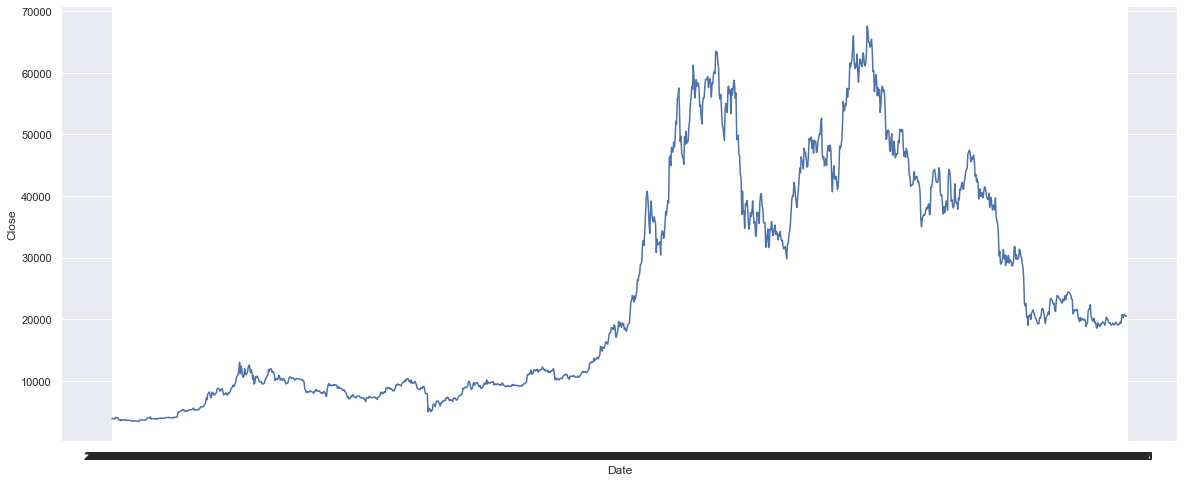

In [3]:
sb.set(rc = {'figure.figsize':(20, 8)})# fix the size of graph so its stretched out more
sb.lineplot(x="Date",y ="Close",data = bitcoinDF) # use .lineplot to graph data
plt.show() # plot graph

In [100]:
# a function that looks at all prices bigger than the average in the "Close" column
greaterThanAverage = bitcoinDF[bitcoinDF['Close']>6951.0]
greaterThanAverage["Close"]

130      7204.771484
131      6972.371582
132      7814.915039
133      7994.416016
134      8205.167969
            ...     
1396    20595.351563
1397    20818.476563
1398    20635.603516
1399    20495.773438
1400    20485.273438
Name: Close, Length: 1237, dtype: float64

In [110]:
# making a new column to look at the comparisson price, based off of a set date
bitcoinDF["Comparisson_Price"] = bitcoinDF["Close"] / 20485.0 # close price of the first of November 2022
bitcoinDF

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Comparisson_Price
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,-96.806641,0.187626
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,-94.193115,0.192502
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,94.307373,0.187295
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,-25.677490,0.188319
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,6.779297,0.187708
...,...,...,...,...,...,...,...,...,...
1396,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910,-307.394532,1.005387
1397,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645,-223.373047,1.016279
1398,2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556,182.378906,1.007352
1399,2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815,137.921875,1.000526


In [103]:
bitcoinDF["Comparisson_Price"] # output rhe comparisson price column

0        2.433070
1        2.496303
2        2.428778
3        2.442057
4        2.434130
          ...    
1396    13.037508
1397    13.178753
1398    13.062989
1399    12.974472
1400    12.967825
Name: Comparisson_Price, Length: 1401, dtype: float64

In [101]:
# making another new column to look at the votalility from the open to close on a given day
bitcoinDF["Volatility"] = bitcoinDF["Open"] - bitcoinDF["Close"] # find the colatility by sibrtaing opening price
# by the closing price
bitcoinDF

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,-96.806641
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,-94.193115
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,94.307373
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,-25.677490
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,6.779297
...,...,...,...,...,...,...,...,...
1396,2022-10-28,20287.957031,20724.980469,20086.068359,20595.351563,20595.351563,43994715910,-307.394532
1397,2022-10-29,20595.103516,20988.394531,20566.484375,20818.476563,20818.476563,40369840645,-223.373047
1398,2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556,182.378906
1399,2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815,137.921875


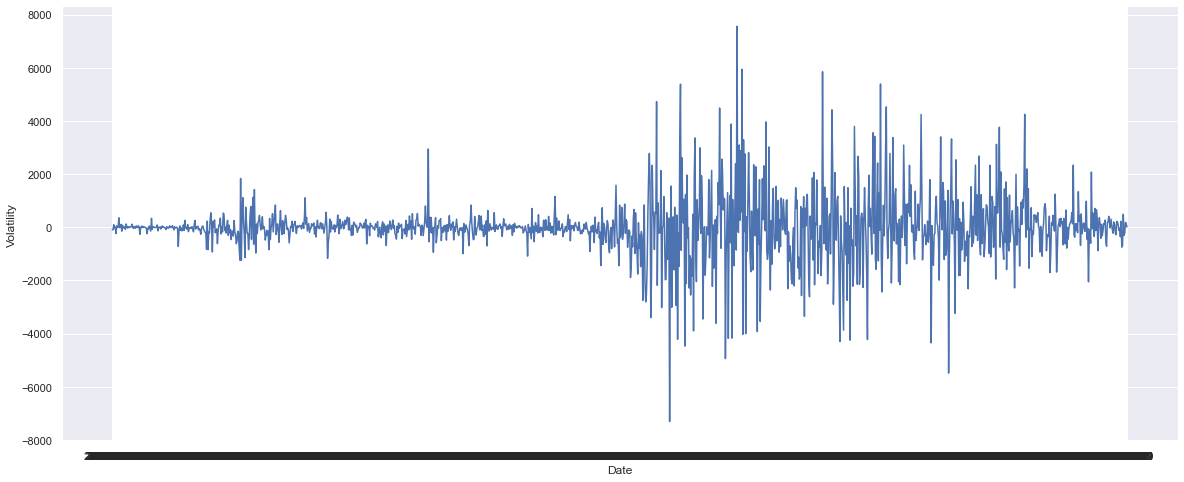

In [182]:
# Graph of the chang in volatility for a day to day basis in the last 3 years
sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size of graph
sb.lineplot(x="Date",y ="Volatility",data = bitcoinDF) # use .lineplot to graph the data
plt.show()

In [82]:
################################################################################################################# 
# ethereum price over the last 3 years
ethDF = pd.read_csv("ETH-USD (2).csv")
ethDF 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
1,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
3,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
4,2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
1396,2022-10-28,1514.323120,1568.633911,1493.871094,1555.477905,1555.477905,19974623205
1397,2022-10-29,1555.274658,1652.382202,1549.983643,1619.698486,1619.698486,21618154775
1398,2022-10-30,1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,13930073427
1399,2022-10-31,1590.481323,1630.452881,1555.918945,1572.714478,1572.714478,19306919714


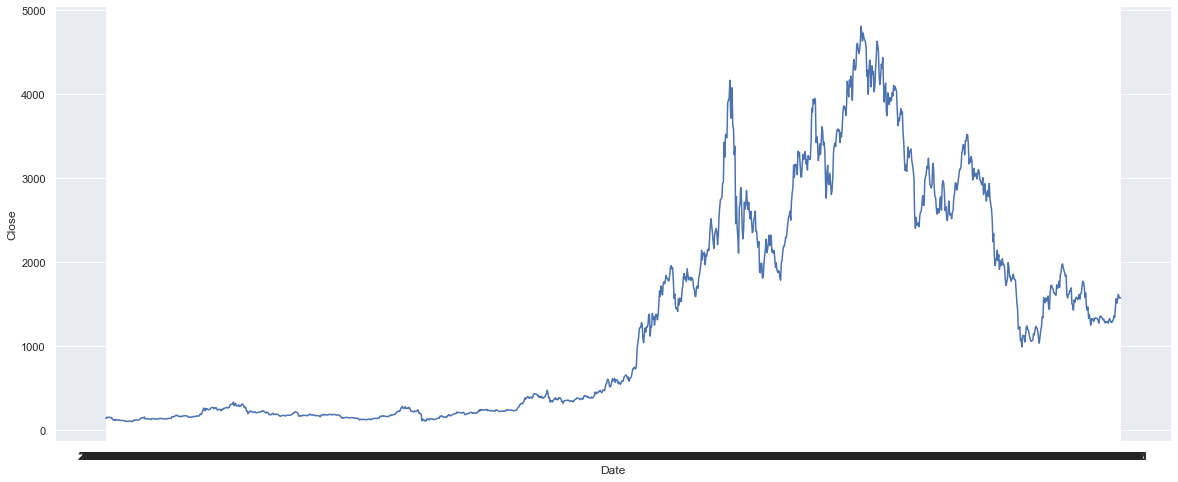

In [183]:
# graph of eth over the last 3 years
sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size
sb.lineplot(x="Date",y ="Close",data = ethDF) # graph the ethereum data
plt.show()

In [68]:
np.mean(ethDF["Close"]) # find the mean close price of eth 

1315.2720371270518

In [131]:
# making a new column to look at the comparisson price, based off of a set date
ethDF["Comparisson_Price"] = ethDF["Close"] / 1315 # mean price if eth
ethDF

,Date,Open,High,Low,Close,Adj Close,Volume,Comparisson_Price
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868,0.107087
1,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369,0.117907
2,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880,0.113411
3,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535,0.117553
4,2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928,0.118356
...,...,...,...,...,...,...,...,...
1396,2022-10-28,1514.323120,1568.633911,1493.871094,1555.477905,1555.477905,19974623205,1.182873
1397,2022-10-29,1555.274658,1652.382202,1549.983643,1619.698486,1619.698486,21618154775,1.231710
1398,2022-10-30,1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,13930073427,1.209721
1399,2022-10-31,1590.481323,1630.452881,1555.918945,1572.714478,1572.714478,19306919714,1.195981


In [96]:
ethDF["Comparisson_Price"] # print the comparisson price

0       0.089143
1       0.098150
2       0.094407
3       0.097855
4       0.098524
          ...   
1396    0.984667
1397    1.025320
1398    1.007016
1399    0.995578
1400    1.000003
Name: Comparisson_Price, Length: 1401, dtype: float64

In [185]:
# making another new column to look at the votalility from the open to close on a given day
ethDF["Volatility"] = ethDF["Open"] - ethDF["Close"] # subtract open by close for every day
ethDF

,Date,Open,High,Low,Close,Adj Close,Volume,Comparisson_Price,Volatility
0,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868,0.107087,-7.401260
1,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369,0.117907,-13.528168
2,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880,0.113411,6.061035
3,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535,0.117553,-5.669052
4,2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928,0.118356,-1.301178
...,...,...,...,...,...,...,...,...,...
1396,2022-10-28,1514.323120,1568.633911,1493.871094,1555.477905,1555.477905,19974623205,1.182873,-41.154785
1397,2022-10-29,1555.274658,1652.382202,1549.983643,1619.698486,1619.698486,21618154775,1.231710,-64.423828
1398,2022-10-30,1619.697876,1637.037842,1579.485229,1590.783325,1590.783325,13930073427,1.209721,28.914551
1399,2022-10-31,1590.481323,1630.452881,1555.918945,1572.714478,1572.714478,19306919714,1.195981,17.766845


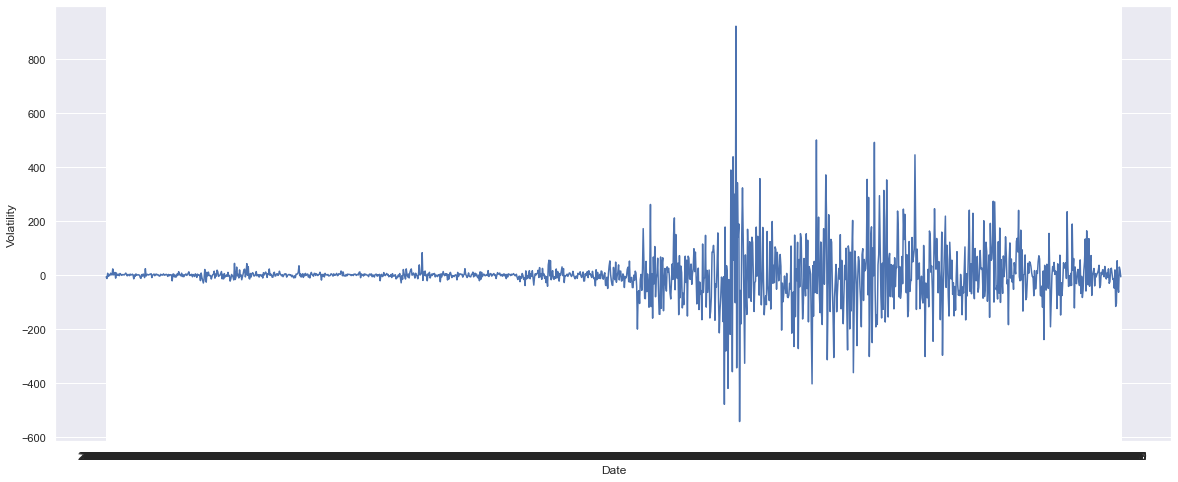

In [186]:
# Graph of the chang in volatility for a day to day basis in the last 3 years
sb.set(rc = {'figure.figsize':(20, 8)})# fix size of graph
sb.lineplot(x="Date",y ="Volatility",data = ethDF) # graoh colatility data for eth
plt.show()

In [73]:
#################################################################################################################
bnbDF = pd.read_csv("BNB-USD.csv") # BNB price over the last 3 years
bnbDF  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637
...,...,...,...,...,...,...,...
1396,2022-10-28,286.841156,300.721802,286.136688,298.014191,298.014191,1072756219
1397,2022-10-29,298.003784,307.914978,295.945251,304.217957,304.217957,1397370727
1398,2022-10-30,304.229919,318.069275,302.534363,313.754791,313.754791,1451550019
1399,2022-10-31,313.671356,336.795319,307.625336,326.360718,326.360718,2168405759


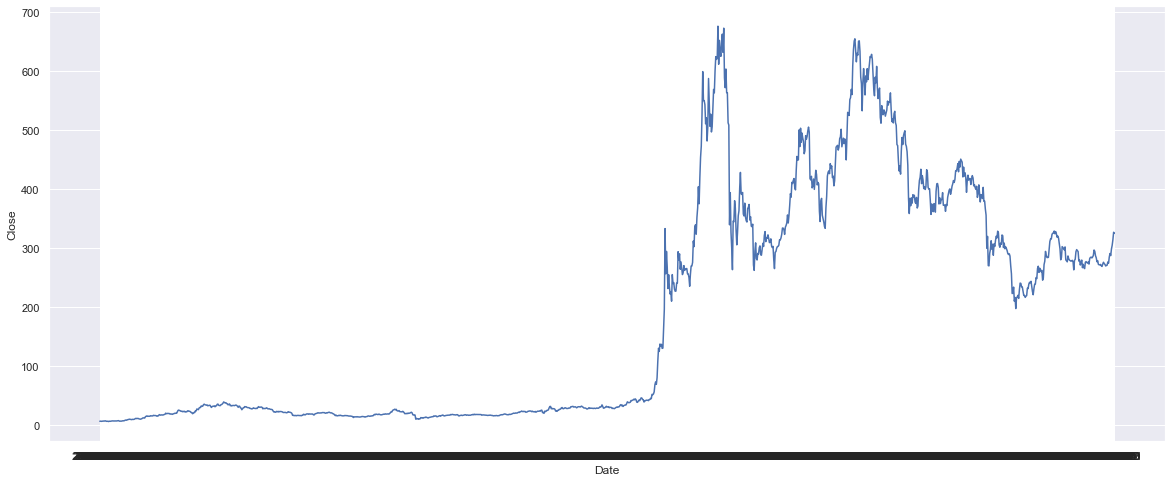

In [187]:
# graph of bnb over the last 3 years
sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size
sb.lineplot(x="Date",y ="Close",data = bnbDF) # plot data using .lineplot
plt.show()

In [132]:
np.mean(bnbDF["Close"]) # find the mean close price of binance

181.90194916274072

In [133]:
bnbDF["Comparisson_Price"] = bnbDF["Close"] / 181.90 # create new column
bnbDF

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Comparisson_Price
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162,0.116159,0.033399
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610,-0.097148,0.034022
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639,0.268372,0.032455
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136,-0.170086,0.033343
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637,-0.009882,0.033345
...,...,...,...,...,...,...,...,...,...
1396,2022-10-28,286.841156,300.721802,286.136688,298.014191,298.014191,1072756219,-11.173035,1.638341
1397,2022-10-29,298.003784,307.914978,295.945251,304.217957,304.217957,1397370727,-6.214173,1.672446
1398,2022-10-30,304.229919,318.069275,302.534363,313.754791,313.754791,1451550019,-9.524872,1.724875
1399,2022-10-31,313.671356,336.795319,307.625336,326.360718,326.360718,2168405759,-12.689362,1.794177


In [105]:
bnbDF["Volatility"] = bnbDF["Open"] - bnbDF["Close"] # create new column for volatility
bnbDF

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility
0,2019-01-01,6.191432,6.191929,5.885122,6.075273,6.075273,23891162,0.116159
1,2019-01-02,6.091465,6.207873,5.949006,6.188613,6.188613,30308610,-0.097148
2,2019-01-03,6.171907,6.175116,5.901559,5.903535,5.903535,22821639,0.268372
3,2019-01-04,5.895052,6.065898,5.863714,6.065138,6.065138,29311136,-0.170086
4,2019-01-05,6.055661,6.204376,6.034071,6.065543,6.065543,30340637,-0.009882
...,...,...,...,...,...,...,...,...
1396,2022-10-28,286.841156,300.721802,286.136688,298.014191,298.014191,1072756219,-11.173035
1397,2022-10-29,298.003784,307.914978,295.945251,304.217957,304.217957,1397370727,-6.214173
1398,2022-10-30,304.229919,318.069275,302.534363,313.754791,313.754791,1451550019,-9.524872
1399,2022-10-31,313.671356,336.795319,307.625336,326.360718,326.360718,2168405759,-12.689362


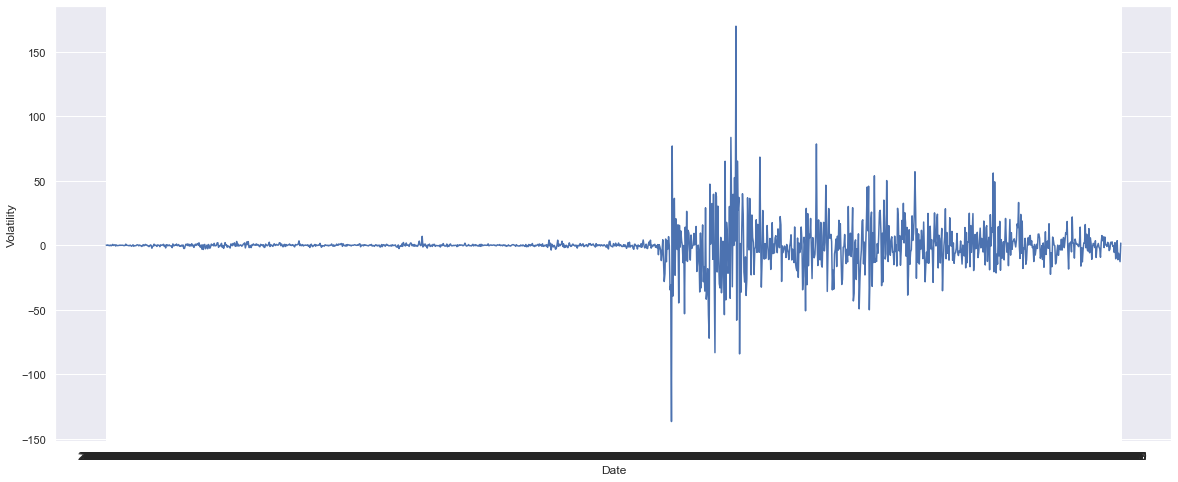

In [188]:
# graph of bnb over the last 3 years
sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size of graph
sb.lineplot(x="Date",y ="Volatility",data = bnbDF) # plot volatility of binance
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Close'>

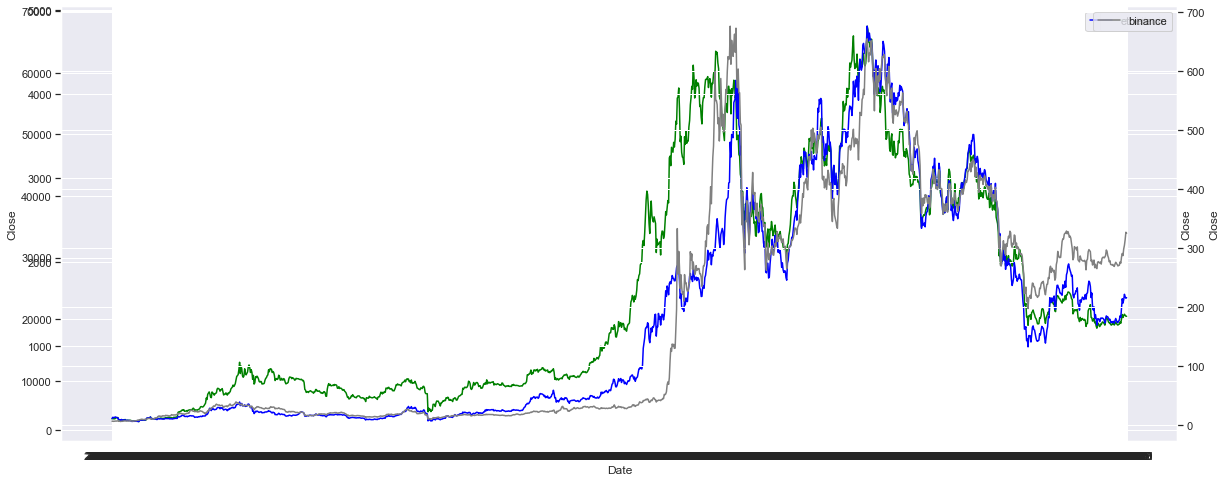

In [139]:
fig,ax1 = plt.subplots()
# This graph is more so you can see how closley connected these top 3 cryptos really are to each other
# since the 3 coins all have very diffrent start and end prices its important to ignore the Close data on the left
# https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib
    # this is the source where I found out how to color the lines
sb.set(rc = {'figure.figsize':(20, 8)})
sb.lineplot(x="Date",y="Close",data = bitcoinDF,ax=ax1,label = "bitcoin",color = "green")
ax2 = ax1.twinx()
sb.lineplot(x="Date",y="Close",data = ethDF,ax=ax2, label = "ethereum", color = "blue")
ax3 = ax2.twinx()
sb.lineplot(x="Date",y="Close",data = bnbDF, ax=ax3, label = "binance", color = "grey")

In [142]:
################################################################################################################# 
teslaDf = pd.read_csv("HistoricalData_1670347771139.csv") # tesla data over the last 5 years
# Changing the dollar sign to an empty character
teslaDf["Close/Last"] = teslaDf["Close/Last"].str.replace("$","")
teslaDf["Open"] = teslaDf["Open"].str.replace("$","")
teslaDf["High"] = teslaDf["High"].str.replace("$","")
teslaDf["Low"] = teslaDf["Low"].str.replace("$","")
teslaDf

/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/3130884983.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teslaDf["Close/Last"] = teslaDf["Close/Last"].str.replace("$","")
/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/3130884983.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teslaDf["Open"] = teslaDf["Open"].str.replace("$","")
/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/3130884983.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  teslaDf["High"] = teslaDf

,Date,Close/Last,Volume,Open,High,Low
0,12/05/2022,182.45,93122670,189.44,191.27,180.55
1,12/02/2022,194.86,73645920,191.78,196.25,191.11
2,12/01/2022,194.7,80046210,197.08,198.92,191.8
3,11/30/2022,194.7,109186400,182.43,194.76,180.6301
4,11/29/2022,180.83,83357110,184.99,186.38,178.75
...,...,...,...,...,...,...
1253,12/12/2017,22.7353,130733485,22.03,22.7627,22.002
1254,12/11/2017,21.9273,118891291,20.9753,21.934,20.9167
1255,12/08/2017,21.0087,51991294,20.9733,21.132,20.7507
1256,12/07/2017,20.7493,71693814,20.8,21.2423,20.7367


In [143]:
type(teslaDf["Date"][10]) # check the type of the date

str

In [144]:
# Changing these collumns from strings to floats so it can be read correctly seaborn
teslaDf["Close/Last"] = pd.to_numeric(teslaDf["Close/Last"])
teslaDf["Open"] = pd.to_numeric(teslaDf["Open"])
teslaDf["High"] = pd.to_numeric(teslaDf["High"])
teslaDf["Low"] = pd.to_numeric(teslaDf["Low"])
type(teslaDf["Open"][3]) # test the type to make sure its no longer a string

numpy.float64

In [145]:
teslaDf["Date"] # print out the date column

0       12/05/2022
1       12/02/2022
2       12/01/2022
3       11/30/2022
4       11/29/2022
           ...    
1253    12/12/2017
1254    12/11/2017
1255    12/08/2017
1256    12/07/2017
1257    12/06/2017
Name: Date, Length: 1258, dtype: object

In [146]:
highestAllTimeTeslaPrice = teslaDf[["Date","High"]].sort_values("High",ascending= False)
# find the highest 10 Closing values of Tesla

In [147]:
highestAllTimeTeslaPrice.head(1) # look at highest price of all time

,Date,High
272,11/04/2021,414.4966


In [149]:
teslaDf["New_Date"] = pd.to_datetime(teslaDf["Date"]) # use pd.to_datetime to fix the graph
teslaDf["New_Date"]

0      2022-12-05
1      2022-12-02
2      2022-12-01
3      2022-11-30
4      2022-11-29
          ...    
1253   2017-12-12
1254   2017-12-11
1255   2017-12-08
1256   2017-12-07
1257   2017-12-06
Name: New_Date, Length: 1258, dtype: datetime64[ns]

In [150]:
teslaDf = teslaDf.sort_values("New_Date",ascending = True) # switch the values so the graph is not backwards
teslaDf

,Date,Close/Last,Volume,Open,High,Low,New_Date
1257,12/06/2017,20.8840,107767101,20.0067,20.8927,20.0000,2017-12-06
1256,12/07/2017,20.7493,71693814,20.8000,21.2423,20.7367,2017-12-07
1255,12/08/2017,21.0087,51991294,20.9733,21.1320,20.7507,2017-12-08
1254,12/11/2017,21.9273,118891291,20.9753,21.9340,20.9167,2017-12-11
1253,12/12/2017,22.7353,130733485,22.0300,22.7627,22.0020,2017-12-12
...,...,...,...,...,...,...,...
4,11/29/2022,180.8300,83357110,184.9900,186.3800,178.7500,2022-11-29
3,11/30/2022,194.7000,109186400,182.4300,194.7600,180.6301,2022-11-30
2,12/01/2022,194.7000,80046210,197.0800,198.9200,191.8000,2022-12-01
1,12/02/2022,194.8600,73645920,191.7800,196.2500,191.1100,2022-12-02


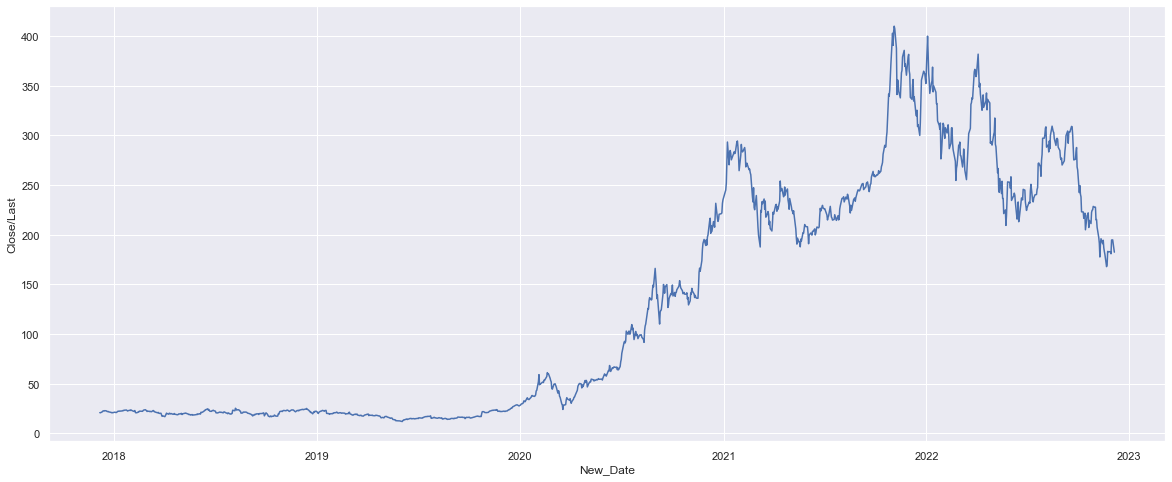

In [151]:
sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size of the graph
sb.lineplot(x="New_Date",y="Close/Last",data = teslaDf) # .lineplot to graph tesla
plt.show()# print graph

In [156]:
################################################################################################################# 
appleDF = pd.read_csv("HistoricalData_1670348126784.csv") # apple data over the last 5 years
# replace the $ with an empty character
appleDF["Close/Last"] = appleDF["Close/Last"].str.replace("$","")
appleDF["Open"] = appleDF["Open"].str.replace("$","")
appleDF["High"] = appleDF["High"].str.replace("$","")
appleDF["Low"] = appleDF["Low"].str.replace("$","")
appleDF

/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/282427352.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appleDF["Close/Last"] = appleDF["Close/Last"].str.replace("$","")
/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/282427352.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appleDF["Open"] = appleDF["Open"].str.replace("$","")
/var/folders/wl/tr6p4_313g5f1hh3lwbxmy8m0000gn/T/ipykernel_8452/282427352.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  appleDF["High"] = appleDF["H

,Date,Close/Last,Volume,Open,High,Low
0,12/05/2022,146.63,68826440,147.77,150.9199,145.77
1,12/02/2022,147.81,65447450,145.96,148,145.65
2,12/01/2022,148.31,71250420,148.21,149.13,146.61
3,11/30/2022,148.03,111380900,141.395,148.72,140.55
4,11/29/2022,141.17,83763800,144.29,144.81,140.355
...,...,...,...,...,...,...
1253,12/12/2017,42.925,76352680,43.0375,43.0975,42.8653
1254,12/11/2017,43.1675,137043560,42.3,43.2225,42.1975
1255,12/08/2017,42.3425,93143040,42.6225,42.75,42.205
1256,12/07/2017,42.33,102624440,42.2575,42.61,42.2275


In [157]:
# Changing these collumns from strings to floats so it can be read correctly by seaborn
appleDF["Close/Last"] = pd.to_numeric(appleDF["Close/Last"])
appleDF["Open"] = pd.to_numeric(appleDF["Open"])
appleDF["High"] = pd.to_numeric(appleDF["High"])
appleDF["Low"] = pd.to_numeric(appleDF["Low"])

In [164]:
appleDF["New_Date"] = pd.to_datetime(appleDF["Date"]) # use pd.to_datetime to fix the grpah
appleDF["New_Date"]

0      2022-12-05
1      2022-12-02
2      2022-12-01
3      2022-11-30
4      2022-11-29
          ...    
1253   2017-12-12
1254   2017-12-11
1255   2017-12-08
1256   2017-12-07
1257   2017-12-06
Name: New_Date, Length: 1258, dtype: datetime64[ns]

In [165]:
appleDF = appleDF.sort_values("New_Date",ascending = True) # switch the way the values are sorted so the graph
# print in the correct direction
appleDF

,Date,Close/Last,Volume,Open,High,Low,New_Date
1257,12/06/2017,42.2525,113591240,41.8750,42.5512,41.6150,2017-12-06
1256,12/07/2017,42.3300,102624440,42.2575,42.6100,42.2275,2017-12-07
1255,12/08/2017,42.3425,93143040,42.6225,42.7500,42.2050,2017-12-08
1254,12/11/2017,43.1675,137043560,42.3000,43.2225,42.1975,2017-12-11
1253,12/12/2017,42.9250,76352680,43.0375,43.0975,42.8653,2017-12-12
...,...,...,...,...,...,...,...
4,11/29/2022,141.1700,83763800,144.2900,144.8100,140.3550,2022-11-29
3,11/30/2022,148.0300,111380900,141.3950,148.7200,140.5500,2022-11-30
2,12/01/2022,148.3100,71250420,148.2100,149.1300,146.6100,2022-12-01
1,12/02/2022,147.8100,65447450,145.9600,148.0000,145.6500,2022-12-02


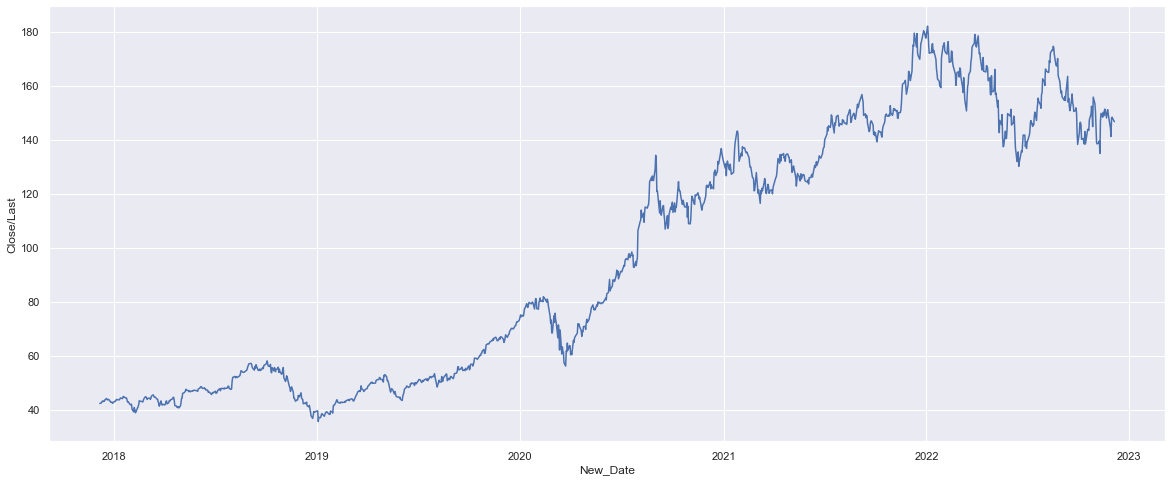

In [167]:
 sb.set(rc = {'figure.figsize':(20, 8)}) # fix the size of the graph
sb.lineplot(x="New_Date",y="Close/Last",data = appleDF) # use .lineplot to graph the apple data
plt.show() # print graph

In [39]:
appleDF[["Date","High"]].sort_values("High",ascending = False).head(1)  # find highest apple price

,Date,High
225,01/04/2022,182.94


<AxesSubplot:xlabel='New_Date', ylabel='Close/Last'>

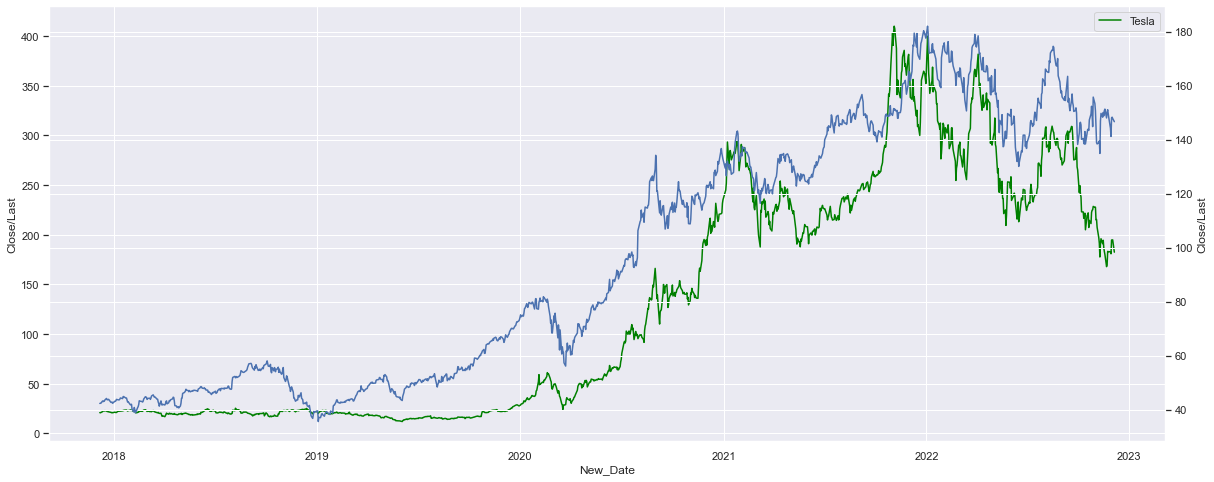

In [170]:
fig,ax1 = plt.subplots()
# graph the tesla data and appe data on the same plots
sb.set(rc = {'figure.figsize':(20, 8)})
sb.lineplot(x="New_Date",y="Close/Last",data = teslaDf,ax=ax1,label = "Tesla", color = "green")
ax2 = ax1.twinx()
sb.lineplot(x="New_Date",y="Close/Last",data = appleDF,ax=ax2)